# KNN

In [3]:
import numpy as np
import pandas as pd
import operator

## KNN简单实现

### 准备数据集

In [8]:
def createDataSet():
    group = np.array([[1, 101], [5, 89], [108, 5], [115, 8]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

group, labels = createDataSet()
print(group)
print(labels)

[[  1 101]
 [  5  89]
 [108   5]
 [115   8]]
['A', 'A', 'B', 'B']


### knn 算法实现

**parameters:**
- inX: 用于分类的数据（测试集）
- dataSet: 用于训练的数据（训练集）
- labels: 分类标签
- k: 超参数

**return:**
- sortedClassCount[0][0]: 字典，次数最高的类别，即测试样本预测标签

In [14]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    # 计算欧式距离
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distance = sqDistances ** 0.5
    sortedDistIndicies = distance.argsort()  # 得到测试样本inX与所有训练样本的距离排序索引
    classCount = {}
    for i in range(k):  # 选择距离最小的k个样本
        voteIlabel = labels[sortedDistIndicies[i]]  # 对应类别
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1  # 对应类别计数
    # key=operator.itemgetter(1)-根据字典值排序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]  # 返回次数最多的类别

In [16]:
group, labels = createDataSet()
test = [101, 20]
pred_test = classify0(test, group, labels, 3)
print(pred_test)

B


## 使用KNN进行约会网站配对效果判定

### 构建训练集

In [17]:
def file2matrix(path):
    '''
    打开并解析文件，对数据进行分类：1-不喜欢；2-魅力一般；3-极具魅力
    
    parameters:
        path - 文件路径
    return:
        returnMat - 特征矩阵
        classLabelVector - 类别 label 向量
    '''
    fr = open(path, mode='r', encoding='utf-8')
    arrayOfLines = fr.readlines()
    # 针对有BOM的UTF-8文本，应该去掉BOM，否则后面会引发错误
    arrayOfLines[0] = arrayOfLines[0].lstrip('\ufeff')
    numberOfLines = len(arrayOfLines)
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()  # s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0: 3]
        
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        else:
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

In [18]:
path = './datasets/datingTestSet.txt'
datingDataMat, datingLabels = file2matrix(path)
print(datingDataMat)
print(datingLabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

### 可视化

In [20]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [29]:
def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
#     font = FontProperties(fname=r"c:\windows\fonts\simsunb.ttf", size=14)  # 需要查看自己的电脑是否会包含该字体
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2,
                            ncols=2,
                            sharex=False,
                            sharey=False,
                            figsize=(13, 8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:, 0],
                      y=datingDataMat[:, 1],
                      color=LabelsColors,
                      s=15,
                      alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',
                                          fontsize=14)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',
                                            fontsize=14)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占比',
                                            fontsize=14)
    plt.setp(axs0_title_text, size=9, weight='bold', color='k')
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:, 0],
                      y=datingDataMat[:, 2],
                      color=LabelsColors,
                      s=15,
                      alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',
                                          fontsize=14)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',
                                            fontsize=14)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',
                                            fontsize=14)
    plt.setp(axs1_title_text, size=9, weight='bold', color='k')
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:, 1],
                      y=datingDataMat[:, 2],
                      color=LabelsColors,
                      s=15,
                      alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',
                                          fontsize=14)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',
                                            fontsize=14)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',
                                            fontsize=14)
    plt.setp(axs2_title_text, size=9, weight='bold', color='k')
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [],
                              color='black',
                              marker='.',
                              markersize=6,
                              label='didntLike')
    smallDoses = mlines.Line2D([], [],
                               color='orange',
                               marker='.',
                               markersize=6,
                               label='smallDoses')
    largeDoses = mlines.Line2D([], [],
                               color='red',
                               marker='.',
                               markersize=6,
                               label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[0][1].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[1][0].legend(handles=[didntLike, smallDoses, largeDoses])
    #显示图片
    plt.tight_layout()
    plt.show()

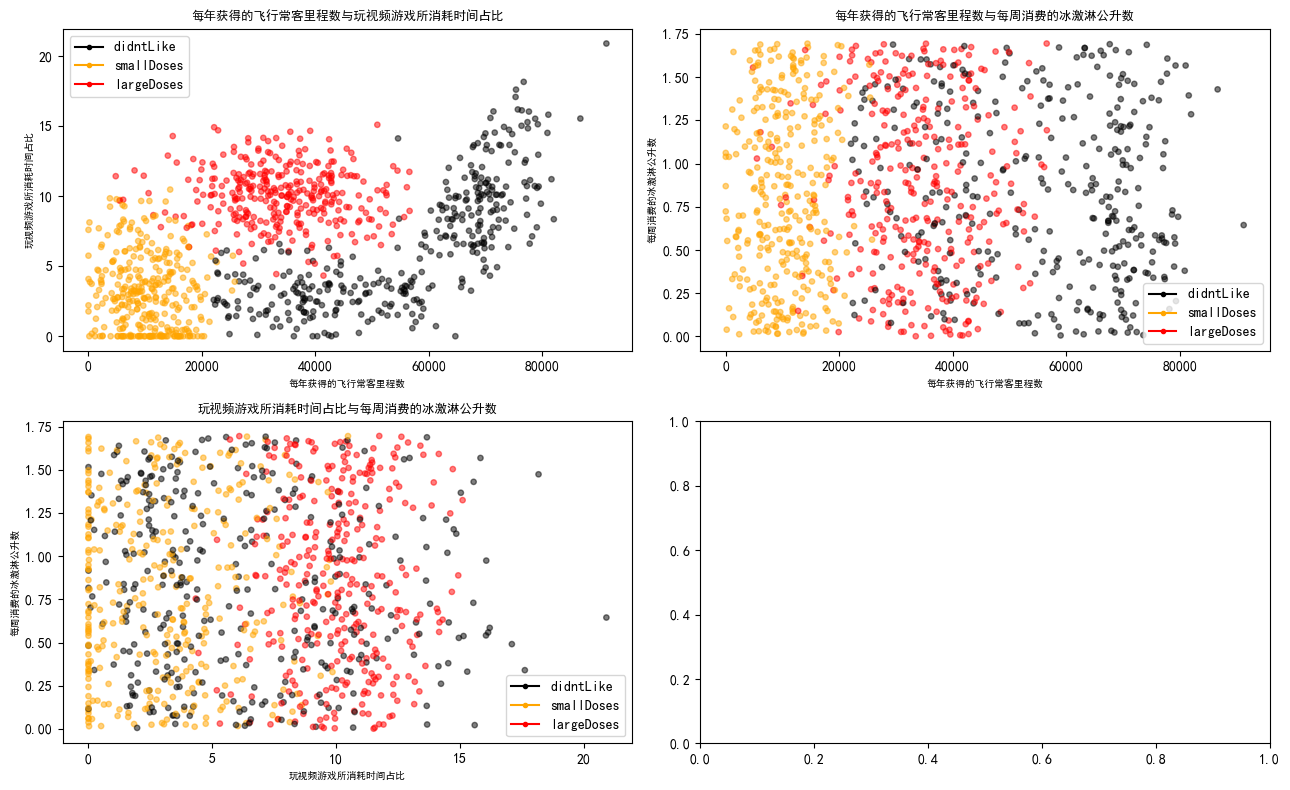

In [30]:
showdatas(datingDataMat, datingLabels)

### 数据归一化

In [37]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [38]:
normDataSet, ranges, minVals = autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


### test

In [45]:
def datingClassTest():
    filename = './datasets/datingTestSet.txt'
    datingDataMat, datingLabels = file2matrix(filename)
    hoRatio = 0.1  # 取所有数据的10%
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)  # 测试数据个数
    errorCount = 0

    for i in range(numTestVecs):
        # 前numTestVecs个数据作为测试集，后m-numTestVecs个数据作为训练集
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :],
                                     datingLabels[numTestVecs:m], 4)
        print("分类结果:%s\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount / float(numTestVecs) * 100))

In [46]:
datingClassTest()

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3

- 错误率是4%，这是一个想当不错的结果。可以改变函数datingClassTest内变量hoRatio和分类器k的值，检测错误率是否随着变量值的变化而增加。依赖于分类算法、数据集和程序设置，分类器的输出结果可能有很大的不同。

### 构建完整可用系统

In [47]:
def classifyPerson():
    resultList = ['讨厌', '有些喜欢', '非常喜欢']
    precentTats = float(input("玩视频游戏所耗时间百分比:"))
    ffMiles = float(input("每年获得的飞行常客里程数:"))
    iceCream = float(input("每周消费的冰激淋公升数:"))

    filename = "./datasets/datingTestSet.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #生成NumPy数组,测试集
    inArr = np.array([ffMiles, precentTats, iceCream])
    #测试集归一化
    norminArr = (inArr - minVals) / ranges
    #返回分类结果
    classifierResult = classify0(norminArr, normMat, datingLabels, 3)
    print("你可能%s这个人" % (resultList[classifierResult - 1]))

In [48]:
classifyPerson()

玩视频游戏所耗时间百分比:20
每年获得的飞行常客里程数:50000
每周消费的冰激淋公升数:0.6
你可能非常喜欢这个人


In [51]:
classifyPerson()

玩视频游戏所耗时间百分比:10
每年获得的飞行常客里程数:10000
每周消费的冰激淋公升数:0.5
你可能有些喜欢这个人


In [52]:
classifyPerson()

玩视频游戏所耗时间百分比:8
每年获得的飞行常客里程数:5000
每周消费的冰激淋公升数:0.6
你可能有些喜欢这个人
